# Tutorial 3 - Espacios de color

Durante la semana hemos visto como manipular imágenes en el espacio del color
En este tutorial abordaremos los siguientes conceptos:

- Clustering de pixeles en RGB
- Segmentación de imágenes en HSV

In [ ]:
!pip install scikit-learn

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Clustering de pixeles en RGB

Para este ejercicio, desarrollaremos un ejemplo visto en clase para clusterizar los colores de una imagen. 

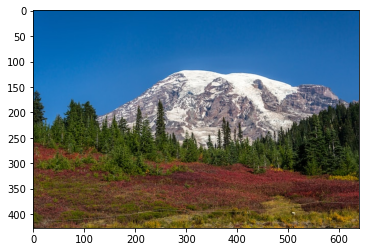

In [2]:
landscape_rgb = cv2.imread('landscape.jpeg', cv2.IMREAD_COLOR)[:, :, ::-1]
plt.imshow(landscape_rgb)

In [3]:
landscape_rgb.shape

(427, 640, 3)

## Preparar la matriz

El primer paso consiste en "aplanar" la imagen para tener una matriz 2D.

In [4]:
n_rows, n_cols, n_colors = landscape_rgb.shape
landscape_array = landscape_rgb.reshape(n_rows*n_cols, n_colors)
landscape_array

array([[  0,  92, 169],
       [  0,  92, 169],
       [  0,  92, 169],
       ...,
       [122,  91,  37],
       [121,  93,  45],
       [106,  79,  32]], dtype=uint8)

In [5]:
landscape_array.shape

(273280, 3)

Con esto, podemos visualizar los colores de la imagen en el espacio RGB. Elegiremos una pequeña muestra de pixeles para que sea más fácil ver lo que está pasando. 

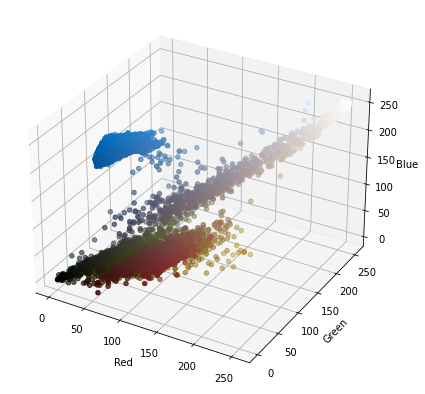

In [6]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Elegimos una muestra de pixeles para no graficar la imagen entera
np.random.seed(42)
ix_sample = np.random.choice(np.arange(len(landscape_array)), size=5_000, replace=False)
sample = landscape_array[ix_sample, :]

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.scatter3D(sample[:, 0], sample[:, 1], sample[:, 2], c=sample/255)

## Encontrar clusters con KMeans

Ahora usaremos KMeans para encontrar los clusters de los colores. En particular, usaremos la clase MiniBatchKMeans de scikit-learn, ya que es más rápida para datasets más grandes.

In [7]:
n_clusters = 4

kmean = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
fitted_clusters = kmean.fit_predict(landscape_array)
fitted_clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [8]:
kmean.cluster_centers_

array([[ 24.18318341, 107.53070569, 177.07594201],
       [111.93318521,  89.04616207,  63.46384255],
       [199.69284593, 194.54355246, 193.37005939],
       [ 56.91912486,  49.3624559 ,  20.026376  ]])

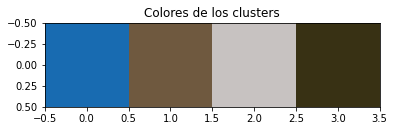

In [9]:
plt.title('Colores de los clusters')
plt.imshow([kmean.cluster_centers_.astype(int)])

## Reconstruir imagen a partir de los clusters

A cada pixel, levamos a asignar el valor de la media del cluster al que pertenece.

In [10]:
fitted_clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [11]:
clusters_means = kmean.cluster_centers_[fitted_clusters]
clusters_means

array([[ 24.18318341, 107.53070569, 177.07594201],
       [ 24.18318341, 107.53070569, 177.07594201],
       [ 24.18318341, 107.53070569, 177.07594201],
       ...,
       [111.93318521,  89.04616207,  63.46384255],
       [111.93318521,  89.04616207,  63.46384255],
       [111.93318521,  89.04616207,  63.46384255]])

In [12]:
clusters_means.shape

(273280, 3)

Luego, devolveremos la matriz a las dimensiones originales de la imagen.

In [13]:
clustered_image = clusters_means.reshape(n_rows, n_cols, n_colors)
clustered_image.shape

(427, 640, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


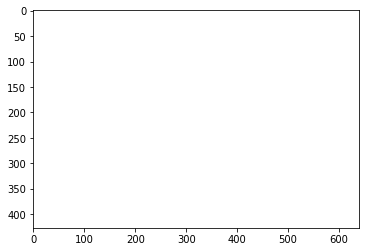

In [14]:
plt.imshow(clustered_image)

¿Por qué tuvimos este error? Resulta que elegimos los valores en formato ```float```. Para poder graficar imágenes, nuestros valores de RGB tienen que ser ```int```.

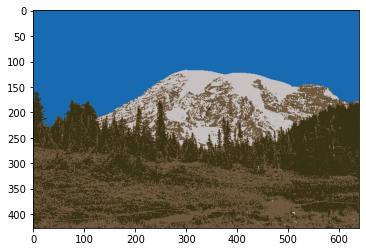

In [15]:
clustered_image_int = clustered_image.astype(int)
plt.imshow(clustered_image_int)

## Probemos distintos números de clusters

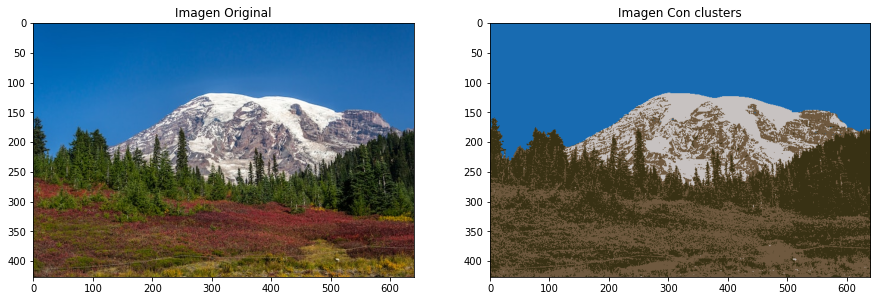

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(landscape_rgb)
plt.subplot(1,2,2)
plt.title('Imagen Con clusters')
plt.imshow(clustered_image_int)

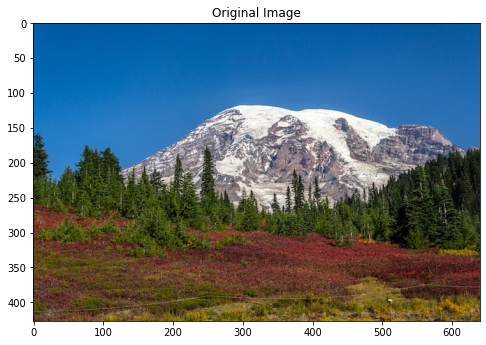

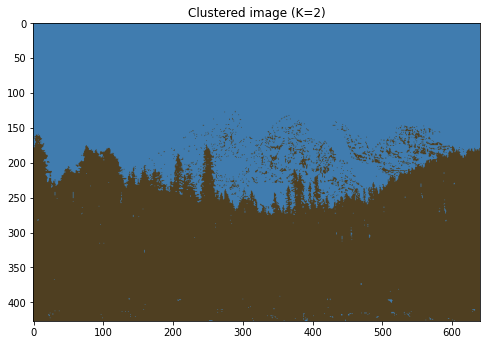

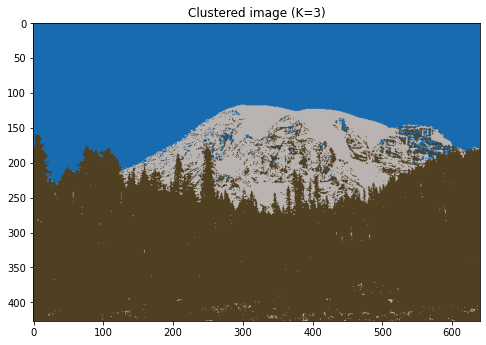

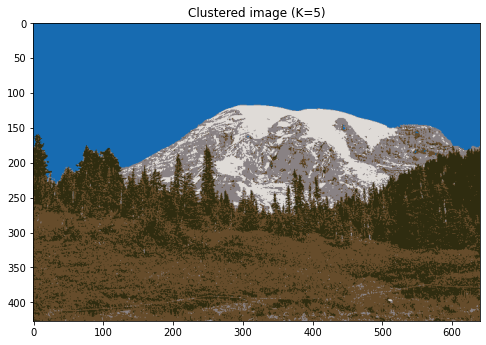

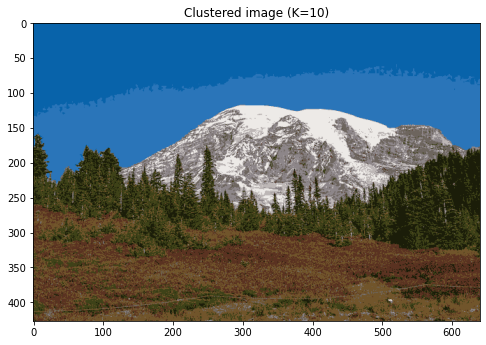

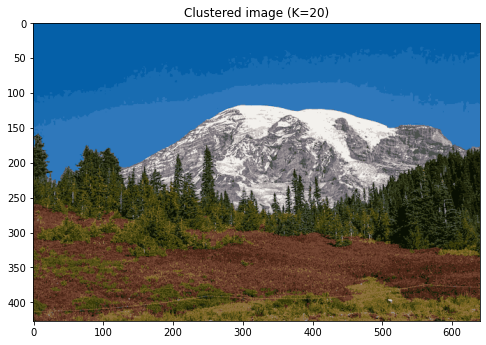

In [17]:
plt.figure(figsize=(8,8))
plt.title(f"Original Image")
plt.imshow(landscape_rgb)
plt.show()

for n_clusters in [2,3,5,10,20]:
    kmean = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    fitted_clusters = kmean.fit_predict(landscape_array)
    clusters_means = kmean.cluster_centers_[fitted_clusters]
    clustered_image = clusters_means.reshape(n_rows, n_cols, n_colors)
    clustered_image_int = clustered_image.astype(int)
    
    # Plot image
    plt.figure(figsize=(8,8))
    plt.title(f"Clustered image (K={n_clusters})")
    plt.imshow(clustered_image_int)
    plt.show()

## Compresión de imagenes

El clustering anterior se podría usar como una forma de "comprimir" la imagen para que use menos espacio. En vez de guardar el valor RGB de todos los pixeles, podemos guardar los 20 colores de las medianas, y que cada entrada de la matriz mapee a cada uno de estos colores.

In [18]:
kmean.cluster_centers_

array([[ 96.08173439,  54.10035741,  37.53922122],
       [131.83755958, 124.97387989, 130.22440419],
       [ 24.5867984 , 108.02582131, 177.86398351],
       [243.03560091, 241.0814059 , 237.37573696],
       [  9.99845381,  15.16080402,   3.45052184],
       [115.72133468,  70.66177958,  51.87340748],
       [183.62347035, 177.4552871 , 176.8672733 ],
       [ 58.28557478,  60.89146205,  10.17703683],
       [ 87.3571716 ,  81.56035003,  26.3619996 ],
       [ 47.29004284, 120.49299969, 187.52465782],
       [  5.13765596,  96.99165474, 168.81673144],
       [141.10076409, 112.60028653,  61.1991404 ],
       [ 74.80665195,  38.81893458,  23.16712669],
       [ 76.68639761,  82.61793722,  77.9793722 ],
       [118.87248191,  99.57402699,  32.97516135],
       [ 34.87061601,  39.08857914,  13.59847122],
       [ 58.24028797,  66.7267047 ,  35.03748981],
       [214.26097712, 208.95145331, 205.32653061],
       [155.79471789, 148.09987995, 150.10756303],
       [105.18560772, 102.71478

In [19]:
fitted_clusters.reshape(n_rows, n_cols)

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [12, 15,  0, ...,  5,  5,  0],
       [12, 12,  7, ...,  8,  8, 12],
       [ 0,  0,  7, ..., 14, 14,  8]], dtype=int32)

¿Cuánto espacio ahorraríamos con esta técnica?

In [20]:
original_image_size = landscape_rgb.size
reconstructed_image_size = kmean.cluster_centers_.size + fitted_clusters.size

print("Tamaño de la imagen original (en bytes):", original_image_size)
print("Tamaño de la reconstrucción por clusters (en bytes):", reconstructed_image_size)
print()
print(f"La reconstrucción pesa un {reconstructed_image_size / original_image_size*100:.2f}% de la imagen original!")

Tamaño de la imagen original (en bytes): 819840
Tamaño de la reconstrucción por clusters (en bytes): 273340

La reconstrucción pesa un 33.34% de la imagen original!


# Segmentación por color usando HSV

Volveremos a ver un ejemplo de segmentación que vimos en el Tutorial 1. El ejercicio original consistía en segmentar una manzana roja de manzanas verdes usando el espacio RGB. Ahora veremos cómo podemos hacer lo mismo en el espacio HSV.

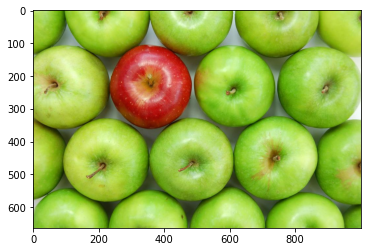

In [21]:
apples_rgb = cv2.imread('manzanas.jpeg', cv2.IMREAD_COLOR)[:, :, ::-1] 
plt.imshow(apples_rgb)

## Repaso: Segmentación usando espacio RGB

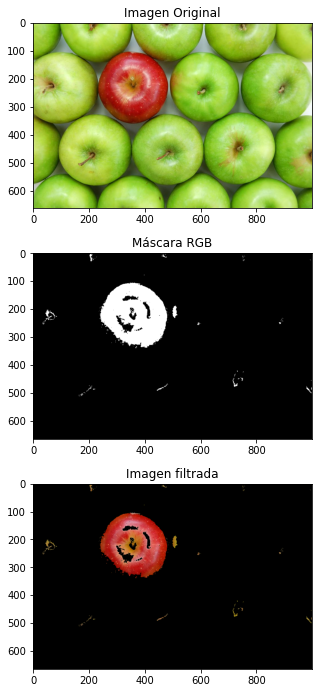

In [22]:
# Segmentación en RGB
r_channel = apples_rgb[:, :, 0]
g_channel = apples_rgb[:, :, 1]
b_channel = apples_rgb[:, :, 2]

rgb_bin = (g_channel < 150) & (r_channel > 150)

rgb_mask = np.stack([rgb_bin,rgb_bin,rgb_bin], axis=-1)
masked_image_rgb = np.multiply(apples_rgb, rgb_mask)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 12))
axes[0].set_title("Imagen Original")
axes[0].imshow(apples_rgb)

axes[1].set_title("Máscara RGB")
axes[1].imshow(rgb_bin, cmap='gray')

axes[2].set_title("Imagen filtrada")
axes[2].imshow(masked_image_rgb)

## Visualización de canales HSV

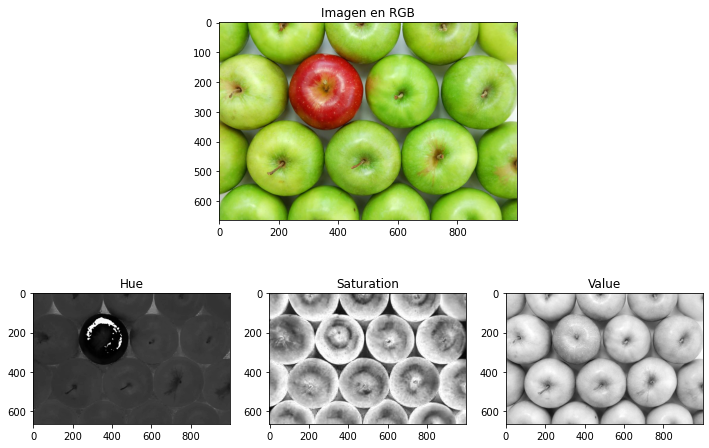

In [23]:
apples_hsv = cv2.cvtColor(apples_rgb, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(12, 8))

# Imagen a color
plt.subplot(2,1,1)
plt.title('Imagen en RGB')
plt.imshow(apples_rgb)

# Canal R
plt.subplot(2,3,4)
plt.title('Hue')
plt.imshow(apples_hsv[:, :, 0], cmap='gray')

# Canal G
plt.subplot(2,3,5)
plt.title('Saturation')
plt.imshow(apples_hsv[:, :, 1], cmap='gray')

# Canal B
plt.subplot(2,3,6)
plt.title('Value')
plt.imshow(apples_hsv[:, :, 2], cmap='gray')

Podemos ver que la manzana roja tiene valores muy bajos y muy altos en el canal "Hue", ¿por qué es esto?

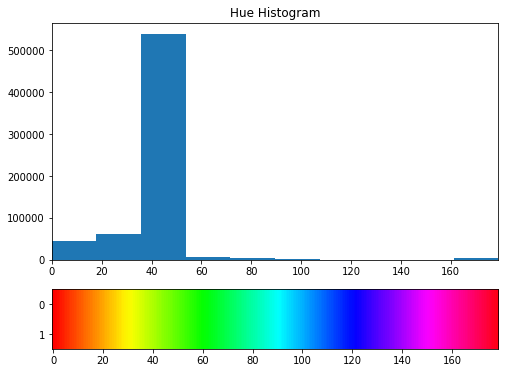

In [24]:
figure, _ = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [4, 1]})

plt.subplot(2,1,1)
plt.title('Hue Histogram')

hue_vals = apples_hsv[:, :, 0].ravel()
plt.hist(hue_vals)
plt.xlim(0,179)

plt.subplot(2,1,2)
gradient = np.linspace(0, 1, 179)
gradient = np.vstack((gradient, gradient))
plt.imshow(gradient, aspect='auto', cmap=plt.get_cmap('hsv'))

El espacio HSV es cíclico, por lo que el primer y ultimo valor son muy cercanos. 
¡Ojo! En OpenCV, el canal hue va de 0 a 179, mientras que los canales Saturation y Value van de 0 a 255.

Ahora podemos segmentar la imagen seleccionando los tonos rojos.

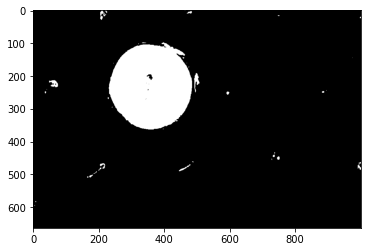

In [25]:
hsv_bin = (apples_hsv[:, :, 0] < 20) | (apples_hsv[:, :, 0] > 160)
plt.imshow(hsv_bin, cmap='gray')

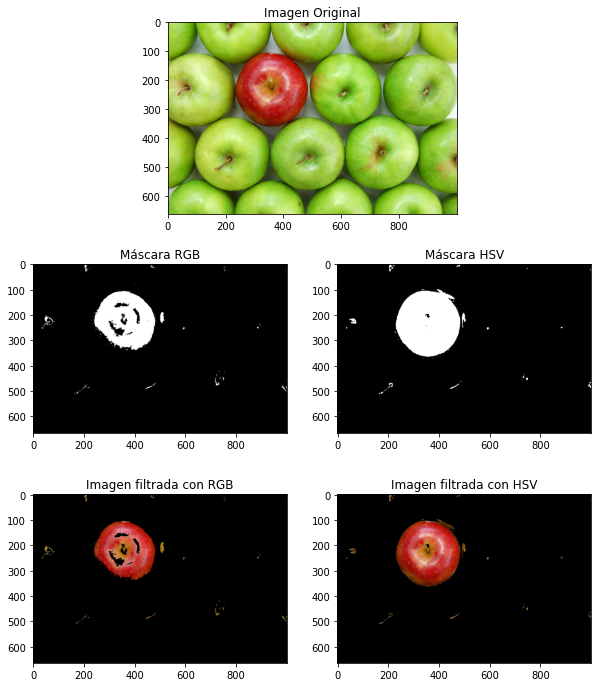

In [27]:
hsv_mask = np.stack([hsv_bin,hsv_bin,hsv_bin], axis=-1)
masked_image_hsv = np.multiply(apples_rgb, hsv_mask)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
plt.subplot(3,1,1)
plt.title("Imagen Original")
plt.imshow(apples_rgb)

plt.subplot(3,2,3)
plt.title("Máscara RGB")
plt.imshow(rgb_bin, cmap='gray')

plt.subplot(3,2,5)
plt.title("Imagen filtrada con RGB")
plt.imshow(masked_image_rgb)

plt.subplot(3,2,4)
plt.title("Máscara HSV")
plt.imshow(hsv_bin, cmap='gray')

plt.subplot(3,2,6)
plt.title("Imagen filtrada con HSV")
plt.imshow(masked_image_hsv)